<a href="https://colab.research.google.com/github/ashmkaur/Adobe_2D_shapes_completer/blob/main/Brain_Tumor_Detection_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip "/content/new brain.zip"

Archive:  /content/new brain.zip
   creating: brain_tumor_dataset/no/
  inflating: brain_tumor_dataset/no/1 no.jpeg  
  inflating: brain_tumor_dataset/no/10 no.jpg  
  inflating: brain_tumor_dataset/no/11 no.jpg  
  inflating: brain_tumor_dataset/no/12 no.jpg  
  inflating: brain_tumor_dataset/no/13 no.jpg  
  inflating: brain_tumor_dataset/no/14 no.jpg  
  inflating: brain_tumor_dataset/no/15 no.jpg  
  inflating: brain_tumor_dataset/no/17 no.jpg  
  inflating: brain_tumor_dataset/no/18 no.jpg  
  inflating: brain_tumor_dataset/no/19 no.jpg  
  inflating: brain_tumor_dataset/no/2 no.jpeg  
  inflating: brain_tumor_dataset/no/20 no.jpg  
  inflating: brain_tumor_dataset/no/21 no.jpg  
  inflating: brain_tumor_dataset/no/22 no.jpg  
  inflating: brain_tumor_dataset/no/23 no.jpg  
  inflating: brain_tumor_dataset/no/24 no.jpg  
  inflating: brain_tumor_dataset/no/25 no.jpg  
  inflating: brain_tumor_dataset/no/26 no.jpg  
  inflating: brain_tumor_dataset/no/27 no.jpg  
  inflating: brain

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import math
# shutil helps in moving files from one foldr to other
import shutil
import os
import glob

In [ ]:
# count number of images in each class no- healthy yes-tumor
ROOT_DIR = "/content/brain_tumor_dataset"

# dictionary created key will be the folder name and no. of images
num_of_images = {}
# listdir gives what is in that folder
for dir in os.listdir(ROOT_DIR):
  # len function gives the length
  # os.listdir gives list of items in directory
    num_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

num_of_images.items()



dict_items([('yes', 155), ('no', 98)])

we will split the data 70% training 15% validation 15% testing

In [ ]:
def dataFolder(path, split):
  # creating a training folder
 if not os.path.exists("./" + path):
  os.mkdir("./" +path)
  for dir in os.listdir(ROOT_DIR):
    os.makedirs("./" + path + "/" + dir)
    for img in np.random.choice(a= os.listdir(os.path.join(ROOT_DIR, dir)), size = (math.floor(split/100*num_of_images[dir])-5), replace = False):
      O = os.path.join(ROOT_DIR, dir, img)
      D = os.path.join("./" + path, dir)
      shutil.copy(O, D)
      os.remove(O)
 else:
  print(f"{path} folder exists.")


In [ ]:
dataFolder("train1", 70)

In [ ]:
dataFolder("val1", 15)

In [ ]:
dataFolder("test1", 15)


In [ ]:
for dir in os.listdir(ROOT_DIR):
  # len function gives the length
  # os.listdir gives list of items in directory
    num_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

num_of_images.items()

dict_items([('yes', 16), ('no', 17)])

MODEL BUILDING


In [ ]:
# we are using sequential model
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing.image import load_img, img_to_array
import keras

CNN NODEL


In [ ]:
model = Sequential()
model.add(Conv2D(filters= 16, kernel_size=(3,3) , activation= "relu", input_shape= (224, 224, 3)))

model.add(Conv2D(filters= 36, kernel_size=(3,3) , activation= "relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters= 64, kernel_size=(3,3) , activation= "relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters= 128, kernel_size=(3,3) , activation= "relu"))
model.add(MaxPool2D(pool_size=(2,2)))

# 0.25 means i want to retain my 75% data. this is done to avoid overfitting
model.add(Dropout(rate= 0.25))
model.add(Flatten())
model.add(Dense(units= 64, activation= "relu"))
model.add(Dropout(rate= 0.25))
model.add(Dense(units= 1, activation= "sigmoid"))
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 220, 220, 36)        │           5,220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 110, 110, 36)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 108, 108, 64)        │          20,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │       5,537,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,638,245 (21.51 MB)

 Trainable params: 5,638,245 (21.51 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer= 'adam', loss= "binary_crossentropy", metrics= ["accuracy"])

In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

PREPARING data using data generator

In [ ]:
def preprocesingImages(path):
  # inut : Path
  # output: Pre processed images
  # we are increasing the dimension by rescale and all for indepth ananlysis
  image_data = ImageDataGenerator(
      rescale= 1./255,
      zoom_range= 0.2,
      shear_range= 0.2,
      horizontal_flip= True)
  image = image_data.flow_from_directory(directory= path, target_size= (224, 224), batch_size= 32, class_mode= "binary")
  return image


In [ ]:
path = "/content/train1"
train_data = preprocesingImages(path)


Found 166 images belonging to 2 classes.


In [ ]:
def preprocesingImages2(path):
  # inut : Path
  # output: Pre processed images
  # we are increasing the dimension by rescale and all for indepth ananlysis
  # we are reducing it for test and val so it accepts all kinds of data;
  image_data = ImageDataGenerator(
      rescale= 1./255)
  image = image_data.flow_from_directory(directory= path, target_size= (224, 224), batch_size= 32, class_mode= "binary")
  return image

In [ ]:
path = "/content/val1"
val_data = preprocesingImages2(path)

Found 27 images belonging to 2 classes.


In [ ]:
path = "/content/test1"
test_data = preprocesingImages2(path)

Found 27 images belonging to 2 classes.


In [ ]:
# early stopping and model checkpoint
from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es= EarlyStopping(monitor = "val_accuracy", min_delta= 0.01, patience= 6, verbose= 1, mode = 'auto')

# model checkpoint
mc = ModelCheckpoint(filepath= "./best_model.keras", monitor= "val_accuracy", verbose= 1, save_best_only= True, mode = 'auto')
cd = [es, mc]

In [ ]:
hs = model.fit(train_data,
                         steps_per_epoch= 8,
                         epochs= 30, verbose = 1,
                         validation_data= val_data,
                         validation_steps= 16,
                         callbacks= cd)


Epoch 1/30
6/8 ━━━━━━━━━━━━━━━━━━━━ 1s 976ms/step - accuracy: 0.6744 - loss: 0.7619
Epoch 1: val_accuracy improved from -inf to 0.81481, saving model to ./best_model.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.6775 - loss: 0.7456 - val_accuracy: 0.8148 - val_loss: 0.5820
Epoch 2/30
6/8 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.7414 - loss: 0.5857
Epoch 2: val_accuracy did not improve from 0.81481
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.7368 - loss: 0.5921 - val_accuracy: 0.8148 - val_loss: 0.5332
Epoch 3/30
5/8 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.7117 - loss: 0.6210
Epoch 3: val_accuracy did not improve from 0.81481
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - accuracy: 0.7068 - loss: 0.6106 - val_accuracy: 0.8148 - val_loss: 0.5146
Epoch 4/30
6/8 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.7170 - loss: 0.6286
Epoch 4: val_accuracy did not improve from 0.81481
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.7094 - loss: 0.6236 - val_accurac

In [ ]:
# model graphical representation
h = hs.history
h.keys()



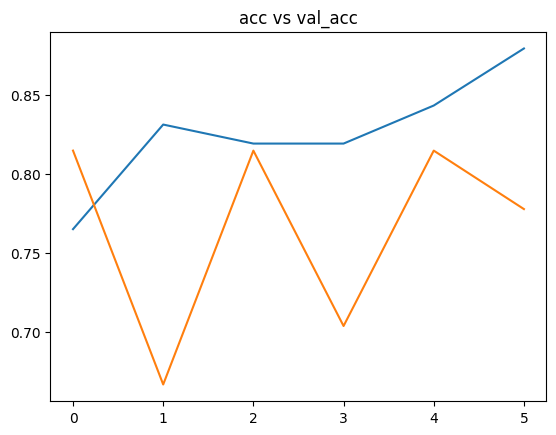

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'])
plt.title("acc vs val_acc")
plt.show()

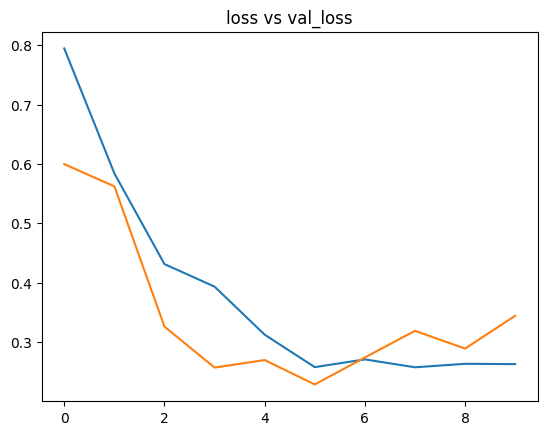

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'])
plt.title("loss vs val_loss")
plt.show()

In [ ]:
# model accuracy
from keras.models import load_model
model = load_model("/content/best_model.keras")

MODEL ACCURACY

In [ ]:
acc = model.evaluate(test_data)[1]
print(f"The accuracy of the model is {acc*100}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.7037 - loss: 0.5237
The accuracy of the model is 70.37037014961243%


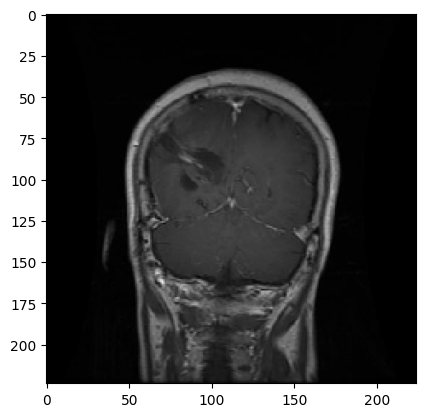

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
The prediction is [[0.66413087]]
The person has tumor


In [ ]:
path = "/content/yes/Y10.jpg"
path1 = "/content/Tr-no_1592.jpg"
path2 = "/content/test/Tumor/Tr-gl_0029.jpg"
img = load_img(path2, target_size= (224, 224))
input_arr = img_to_array(img)/255
plt.imshow(input_arr)
plt.show()
input_arr.shape
input_arr = np.expand_dims(input_arr, axis= 0)

pred = model.predict(input_arr)  # Get the prediction probability
print(f"The prediction is {pred}")
pred_class = (pred > 0.5).astype(int)  # Apply threshold and convert to integer

if pred_class[0][0] == 0:
  print("The person is healthy")
else:
  print("The person has tumor")



In [ ]:
model.save("/content/model_final.h5")

In [ ]:
# This code should work as expected within a Google Colab notebook.
from google.colab import files
files.download("/content/model_final.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>